# Kevin Zhou

# Data Set and Problem Statement

The dataset used for this project can be found here: https://www.kaggle.com/smid80/canadian-federal-election-results-timeseries. The dataset provides information on the Canadian House of Commons elections, with data from seven previous elections that have occurred within the last 20 years. The problem statement is: what factors are good indicators of whether or not a candidate is elected?

# Bar Graph of Ballot Sequence Number and Corresponding Win Probabilities 

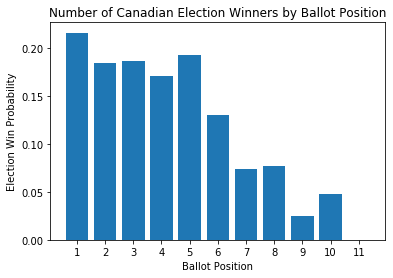

In [2]:
#Imports and reading in Data
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Candidates.csv')

#Getting rid of the rows where the dataset stopped recording whether or not the candidate won or didn't win the election 
for x in range (3480, 11779):
    df.drop([x], axis=0, inplace=True)

#Creating variables to store the number of winners from each ballot position
num1winners = 0
num2winners = 0
num3winners = 0
num4winners = 0
num5winners = 0
num6winners = 0
num7winners = 0
num8winners = 0
num9winners = 0
num10winners = 0
num11winners = 0
#Creating variables to store the total number of candidates from each ballot position
num1 = 0
num2 = 0
num3 = 0
num4 = 0
num5 = 0
num6 = 0
num7 = 0
num8 = 0
num9 = 0
num10 = 0
num11 = 0

#Iterating through the data to count the total number of candidates from each ballot position
#and the number of candidates who won from each ballot position
for x in range(0, 3480):
    if (df['ballot_sequence_number'][x] == 1):
        num1 = num1+1
        if (df['elected_indicator'][x] == 'Y'):
            num1winners = num1winners+1
    if (df['ballot_sequence_number'][x] == 2):
        num2 = num2+1
        if (df['elected_indicator'][x] == 'Y'):
            num2winners = num2winners+1
    if (df['ballot_sequence_number'][x] == 3):
        num3 = num3+1
        if (df['elected_indicator'][x] == 'Y'):
            num3winners = num3winners+1
    if (df['ballot_sequence_number'][x] == 4):
        num4 = num4+1
        if (df['elected_indicator'][x] == 'Y'):
            num4winners = num4winners+1
    if (df['ballot_sequence_number'][x] == 5):
        num5 = num5+1
        if (df['elected_indicator'][x] == 'Y'):
            num5winners = num5winners+1
    if (df['ballot_sequence_number'][x] == 6):
        num6 = num6+1
        if (df['elected_indicator'][x] == 'Y'):
            num6winners = num6winners+1
    if (df['ballot_sequence_number'][x] == 7):
        num7 = num7+1
        if (df['elected_indicator'][x] == 'Y'):
            num7winners = num7winners+1
    if (df['ballot_sequence_number'][x] == 8):
        num8 = num8+1
        if (df['elected_indicator'][x] == 'Y'):
            num8winners = num8winners+1
    if (df['ballot_sequence_number'][x] == 9):
        num9 = num9+1
        if (df['elected_indicator'][x] == 'Y'):
            num9winners = num9winners+1
    if (df['ballot_sequence_number'][x] == 10):
        num10 = num10+1
        if (df['elected_indicator'][x] == 'Y'):
            num10winners = num10winners+1
    if (df['ballot_sequence_number'][x] == 11):
        num11 = num11+1
        if (df['elected_indicator'][x] == 'Y'):
            num11winners = num11winners+1

#Creating the list of ballot positions
ballot_position = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']

#Creating the list of win probabilities, which is calculated for each position as the 
#number of winners from that position over the total number of candidates who had that ballot position
winprobabilities = [num1winners/num1, num2winners/num2, num3winners/num3, num4winners/num4, 
                    num5winners/num5, num6winners/num6, num7winners/num7, num8winners/num8, 
                    num9winners/num9, num10winners/num10, num11winners/num11]

#Creating and displaying the bar graph
plt.bar(ballot_position, winprobabilities)
plt.title('Number of Canadian Election Winners by Ballot Position')
plt.xlabel('Ballot Position')
plt.ylabel('Election Win Probability')
plt.show()

The bar graph is a visualization showing the probability that a candidate from a certain ballot position would win their election for each ballot position. Over the data being analyzed, the ballot positions ranged from 1 to 11, inclusive. To clarify, this doesn’t mean that each election had 11 people running, but rather that in at least one of the elections, there were 11 people running. Thus, there was someone with the 11th ballot position in those elections. With this data, I counted the number of times a candidate had a certain ballot position as well as the number of times each time a candidate from a certain ballot position won an election. Due to the fact that the data stops detailing whether an election was won or not after row 3482 in the Excel spreadsheet, the for loop only iterates through the rows that do contain that piece of information. Then, for each ballot position, I evaluated the number of times a certain ballot position won divided by the number of times that ballot position showed up to determine each ballot position’s “win probability.” These win probabilities were then plotted in a bar graph to show the corresponding win probability for each ballot position. While the bar graph does show a general decrease in win probability as the ballot position number goes up, which would support the idea that a lower number ballot position gives a higher chance of electoral success due to some voters who vote without much knowledge of the candidates themselves, this graph could be a little misleading and a result of correlation and not causation. This is because of the fact that higher ballot positions appearing in an election means that there are more candidates running in that election, so the win probability is inherently expected to be lower. For example, the only times a ballot position of 10 would appear would be when there are 10 or more candidates running, which means that the probability that a candidate in position 10 wins over the scope of the entire data set is expected to be relatively low. 

# K Nearest Neighbor (kNN) Machine Learning Model with a candidate's occupation and how that relates to electoral success 

Accuracy Score: 0.8318965517241379


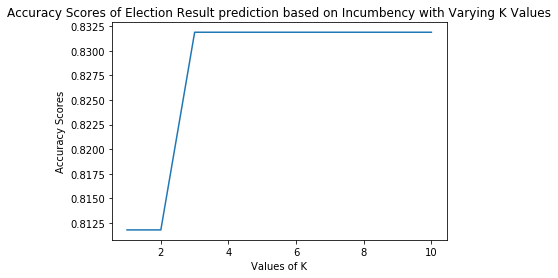

In [3]:
#Import Statements
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Candidates.csv')

#Getting rid of the rows where the dataset stopped recording whether or not the candidate won or didn't win the election 
for x in range (3480, 11779):
    df.drop([x], axis=0, inplace=True)

#Replacing a person's occupation with a 1 if they are a politician and a 0 if they are not
for a in range (0, 3480):
    if (df['candidate_occupation_english_anglais'][a] == 'Politician'):
        df['candidate_occupation_english_anglais'].replace('Politician', 1, inplace=True)
    else:
        String = df['candidate_occupation_english_anglais'][a]
        if (String != 1):
            df['candidate_occupation_english_anglais'].replace(String, 0, inplace=True)

#Creating and fitting the model
x_train, x_test, y_train, y_test = train_test_split(df[['candidate_occupation_english_anglais']], df['elected_indicator'], test_size = .2, random_state = 42)
model = KNeighborsClassifier()
model.fit(x_train, y_train)

#Getting the accuracy score of the model
predictions = model.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, predictions))

#Determining which values of k give the highest accuracy scores
accuracies = []
for k in range (1, 11):
    model2 = KNeighborsClassifier(k)
    model2.fit(x_train, y_train)
    predictions2 = model2.predict(x_test)
    accuracies.append(accuracy_score(y_test, predictions2))
plt.xlabel("Values of K")
plt.ylabel("Accuracy Scores")
plt.title("Accuracy Scores of Election Result prediction based on Incumbency with Varying K Values")
plt.plot(np.arange(1,11, 1), accuracies)

The KNN model analyzes the occupation of a candidate and their electoral success. In order to make this possible and more of a streamlined process, I had to modify the data by changing the values in the occupation column to 0s and 1s, where 0 represents someone whose occupation is not a politician and 1 is someone who is a politician. Another modification I had to make was cutting off the rows of data after and including row 3482 in the Excel spreadsheet because the dataset did not provide in the election indicator column whether or not the candidate was actually elected. After making the necessary modifications, I then created the model and determined its accuracy score. The accuracy score for the default k value of 5 was about .83, and in order to determine what the best value for k would be, I used  a for loop in order to make a model with different k values (from 1 to 10 inclusive) and then plot those results in a graph. The graph shows that k values of 3 and higher are all the optimal k values. The relatively high score for k values of 3 and above shows that there is a pretty strong connection between being a politician and electoral success. 
